In [36]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D


def load_ncal(raw_file: str):
    f = open(raw_file, 'rb')
    raw_data = np.fromfile(f, dtype=np.uint8)
    f.close()

    raw_data = np.uint32(raw_data)
    all_y = raw_data[1::5]
    all_x = raw_data[0::5]
    all_p = (raw_data[2::5] & 128) >> 7  # bit 7
    all_ts = ((raw_data[2::5] & 127) << 16) | (raw_data[3::5] << 8) | (raw_data[4::5])
    all_ts = all_ts / 1e6  # µs -> s
    all_p = all_p.astype(np.float64)
    all_p[all_p == 0] = -1
    events = np.column_stack((all_x, all_y, all_ts, all_p))

    events = events[:16000, :]

    return events

# path = "/space/yyang22/datasets/data/storage/ncars/validation/sequence_12964/"
path = "/space/yyang22/datasets/data/storage/ncars/training/sequence_7/"
events = np.loadtxt(path+'events.txt')
is_car = np.loadtxt(path+'is_car.txt')

# # path = "/space/yyang22/datasets/data/storage/ncaltech101/training/buddha/image_0039.bin"
# path = "/space/yyang22/datasets/data/storage/ncaltech101/training/BACKGROUND_Google/image_0003.bin"
# events = load_ncal(path)
# is_car = "not ncars dataset"

events_x = events[:,0].astype(int)
events_y = events[:,1].astype(int)
max_x = events_x.max()
max_y = events_y.max()
events_t = events[:,2]
events_p = (events[:,3] - 0.5)*2
# events_p = events[:,3]
print(events_p)
events_point = events[:,0:2].astype(int)


print(events)
print(events.shape)
print(is_car)
# print(events_x.max())
# print(np.allclose(events_point[0,:],[46,41]))
# print(events_p)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

In [37]:
colors = []
for i in range(events.shape[0]):
    color = 'b' if events[i,3] == 1 else 'r'
    colors.append(color)
# print(colors)

In [38]:
# fig = plt.figure()
# ax = Axes3D(fig)

# ax.set_xlim(0,np.max(events[:,0]))
# ax.set_zlim(0,np.max(events[:,1]))
# ax.set_ylim(-0.1,0)

# # def update(n):
# #     x = events[n,0]
# #     y = events[n,1]
# #     t = -events[n,2]
# #     c = colors[n]
# #     ax.scatter(x, t, y, c=c, s=0.5)
# # ani = FuncAnimation(fig, update, events.shape[0], interval=100)
# # ani.save('scatter.gif', writer='pillow')

# ax.scatter(events[:,0], -events[:,2], events[:,1], c=colors, s=0.5)

# plt.show()

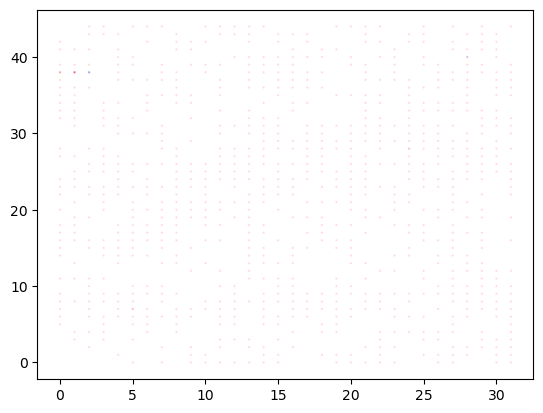

In [39]:
fig, ax = plt.subplots()
ax.scatter(events[:,0], events[:,1], c=colors[:], s=0.5, alpha=0.1)
plt.show()

Locator attempting to generate 1001 ticks ([-3.0, ..., 3.0]), which exceeds Locator.MAXTICKS (1000).


0.0


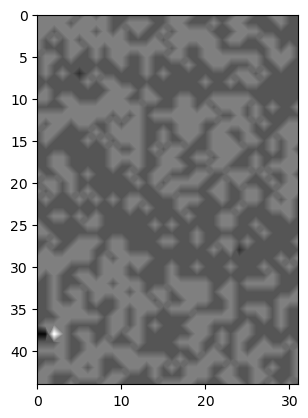

In [40]:
print(is_car)

grid_x = np.arange(0, max_x+1, 1)
grid_y = np.arange(0, max_y+1, 1)
h = np.zeros((max_x+1, max_y+1))

for i in range(events_point.shape[0]):
    idx_x = events_point[i,0]
    idx_y = events_point[i,1]
    h[idx_x,idx_y] += events_p[i]

# for i in range(1000):
#     idx_x = events_point[i,0]
#     idx_y = events_point[i,1]
#     h[idx_x,idx_y] += events_p[i]


fig,ax = plt.subplots()
# levels = ((h.max()-h.min())*10).astype(int)
levels = 1000
# ax = plt.contourf(h.T, levels=levels, cmap='gray')
ax.contourf(h.T, levels=levels, cmap='gray')
ax.axis('scaled')
ax.invert_yaxis()
# cbar = plt.colorbar()
plt.show()




In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob


path = "/space/yyang22/datasets/data/storage/ncars/training/*/events.txt"
files = glob(path)
tot_t_max = 0
for f in files:
    events = np.loadtxt(f)
    events_t = events[:,2]
    t_max = np.max(events_t)
    if t_max > tot_t_max:
        tot_t_max = t_max
print(tot_t_max)  #it's 0.1





0.099999
